# Recursive Text Editing: Result

In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

__author__ = 'Shining'
__email__ = 'mrshininnnnn@gmail.com'

In [2]:
# dependency
# public
import os
%matplotlib inline
# private
from utils import *

## Increasing Sequence Length Analysis

In [225]:
# parameters
method = 'recursion' # end2end, recursion, tagging
data_src = 'nss' # aoi, nss
data_mode = 'online' # online, offline
# bi_gru_rnn_att, bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 10
min_seq_len = 5
max_seq_len = 10
data_size = 10000
val_or_test = 'test' # val, test

In [226]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    data_mode, 
    model_name, 
    method, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}', 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [227]:
# read data
raw_data_dict = {}
for i in range(min_seq_len, max_seq_len+1, 5):
    file_name = os.path.join(LOG_PATH.format(i))
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)[40:-4]

log/nss/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_10/data_size_10000/test.txt


In [228]:
# keys = ['epoch', 'step', 'loss', 'acc', 'token_acc', 'seq_acc']
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [229]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Token Accuracy'
criteria_dict = {}
for i in range(min_seq_len, max_seq_len+1, 5):
    label = 'seq_len_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

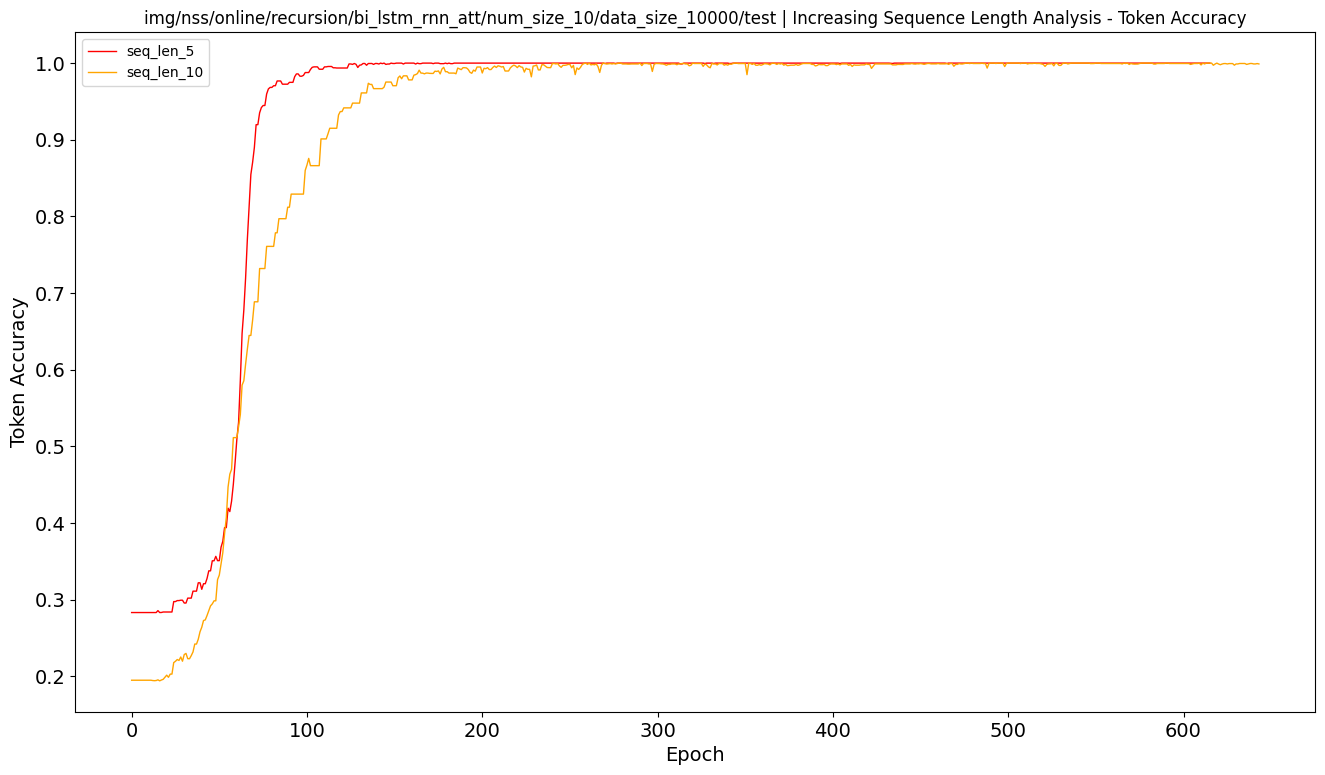

In [230]:
colors = ['red', 'orange', 'skyblue', 'green', 'blue', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Increasing Data Size Analysis

In [144]:
# parameters
method = 'tagging' # end2end, recursion, tagging
data_mode = 'online' # online, offline
# bi_gru_rnn_att, bi_lstm_rnn_att
model_name = 'bi_gru_rnn_att'
num_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 70000

In [145]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_mode, 
    method,
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', 
    '{}.txt'.format(model_name))

In [146]:
# read data
raw_data_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    file_name = LOG_PATH.format(i)
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/online/tagging/num_size_10/seq_len_5/data_size_10000/bi_gru_rnn_att.txt
log/online/tagging/num_size_10/seq_len_5/data_size_20000/bi_gru_rnn_att.txt
log/online/tagging/num_size_10/seq_len_5/data_size_30000/bi_gru_rnn_att.txt
log/online/tagging/num_size_10/seq_len_5/data_size_40000/bi_gru_rnn_att.txt
log/online/tagging/num_size_10/seq_len_5/data_size_50000/bi_gru_rnn_att.txt
log/online/tagging/num_size_10/seq_len_5/data_size_60000/bi_gru_rnn_att.txt
log/online/tagging/num_size_10/seq_len_5/data_size_70000/bi_gru_rnn_att.txt


In [147]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [154]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    label = 'data_size_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

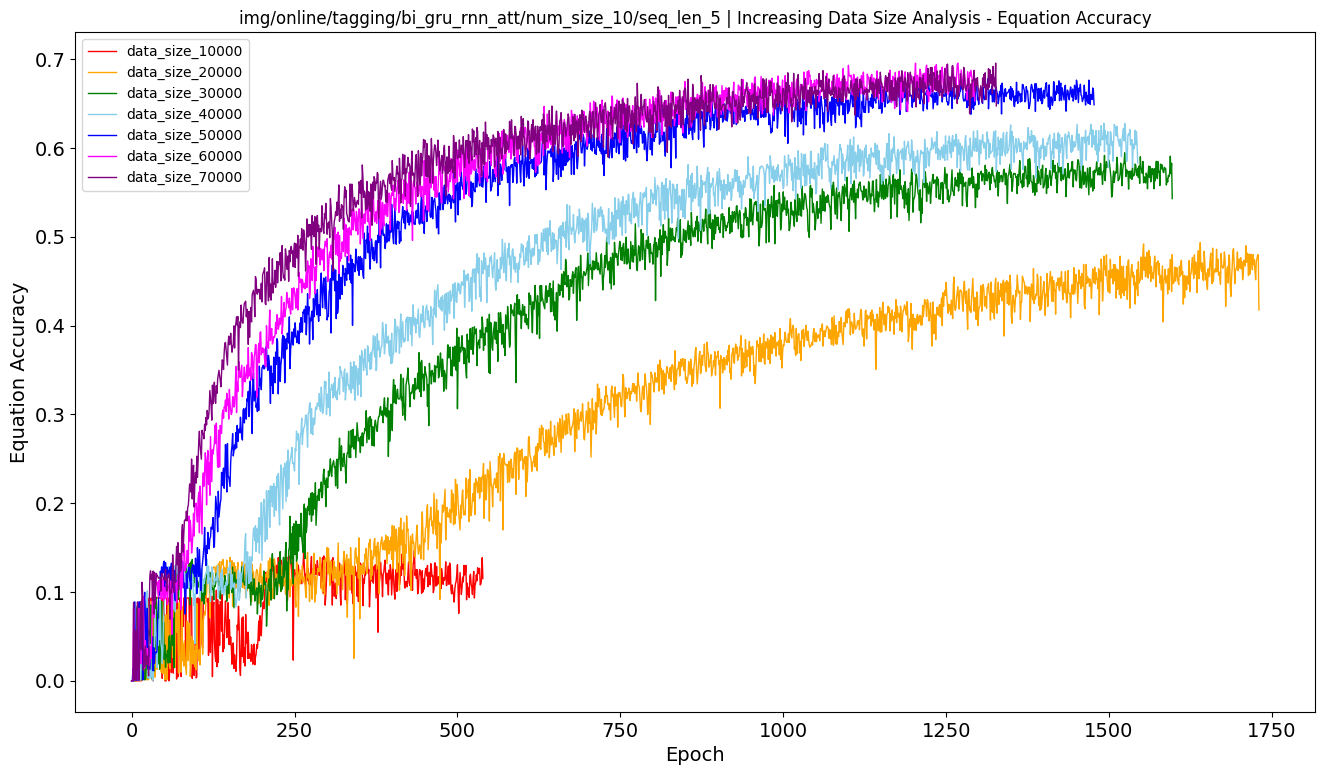

In [155]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len))

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods Comparison

In [193]:
# parameters
candidates = [
    ['offline', 'end2end'], 
#     ['offline', 'recursion'], 
#     ['online', 'end2end'], 
#     ['offline', 'tagging'], 
#     ['online', 'tagging'], 
    ['online', 'recursion']
]
data_src = 'nss' # aoi, nss
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 10
data_size = 10000
val_or_test = 'test' # val, test

In [194]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode
    model_name, 
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [195]:
# read data
raw_data_dict = {}
for c in candidates:
    file_path = LOG_PATH.format(c[0], c[1])
    print(file_path)
    raw_data_dict[file_path] = load_txt(file_path)

log/nss/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_10/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_10/data_size_10000/test.txt


In [196]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [197]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    key = LOG_PATH.format(c[0], c[1])
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

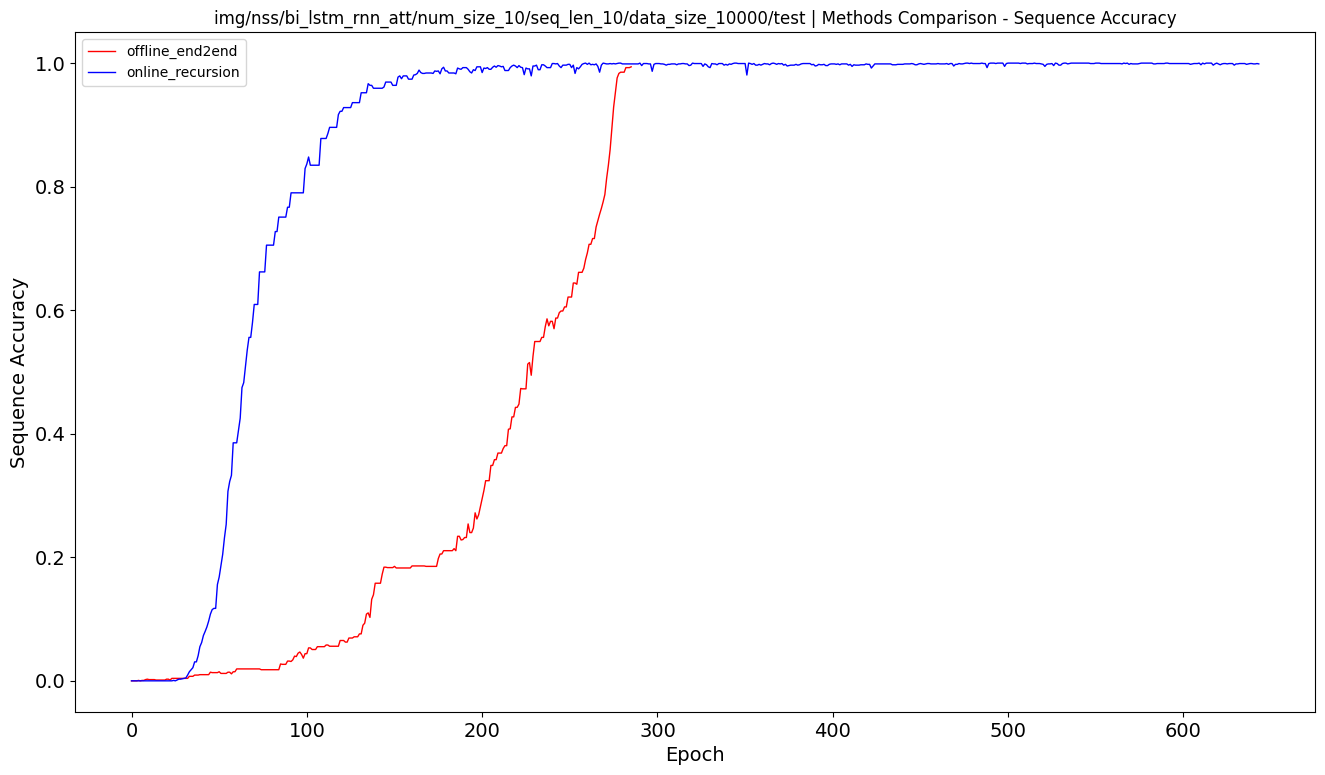

In [198]:
colors = ['red', 'blue', 'green', 'skyblue', 'orange', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods vs. Sequence Length

In [97]:
# parameters
candidates = [
    ['offline', 'end2end'], 
#     ['offline', 'recursion'], 
#     ['online', 'end2end'], 
#     ['online', 'tagging'], 
    ['online', 'recursion']
]
# aoi, nss
data_src = 'nss'
model_name = 'bi_lstm_rnn_att'
num_size = 10
data_size = 10000
min_seq_len = 5
max_seq_len = 10

In [98]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    '{}'.format(data_src), 
    '{}', # data mode
    '{}'.format(model_name),
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}', # sequence length
    'data_size_{}'.format(data_size),
    'val.txt')

In [99]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_seq_len, max_seq_len+1, 5): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)[40:-4]

log/nss/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_10000/val.txt
log/nss/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_10/data_size_10000/val.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_10000/val.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_10/data_size_10000/val.txt


In [100]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [101]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_seq_len, max_seq_len+1, 5): 
        key = LOG_PATH.format(c[0], c[1], i)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

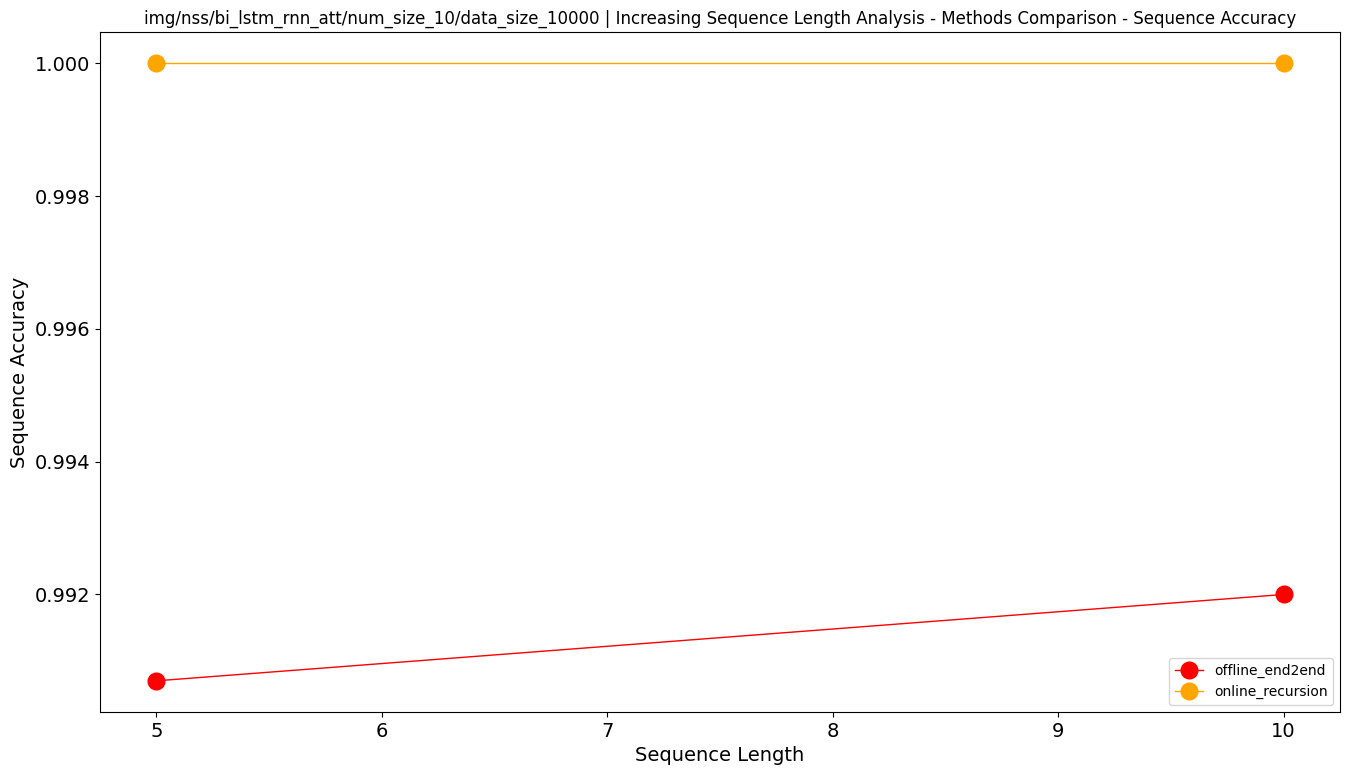

In [102]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size))

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Sequence Length', 
    ylabel=criteria, 
    save_path=save_path, 
    yticks=range(min_seq_len, max_seq_len+1, 5), 
    marker=True
)

## Methods vs. Data Size

In [3]:
# parameters
candidates = [
    ['offline', 'end2end'], 
    ['offline', 'recursion'], 
    ['online', 'end2end'], 
    ['online', 'tagging'], 
    ['online', 'recursion']
]
# aoi, nss
data_src = 'aoi'
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 60000

In [4]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    '{}'.format(data_src), 
    '{}', # data mode
    '{}'.format(model_name),
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', # data size 
    'test.txt')

In [5]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_data_size, max_data_size+1, 10000): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_10000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_20000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_30000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_40000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_50000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_60000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_10000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_20000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_30000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_40000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_50000/test.txt
log/aoi/offline/bi_lstm_rnn_att/r

In [6]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [8]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_data_size, max_data_size+1, 10000):
        key = LOG_PATH.format(c[0], c[1], i)
        print(key)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_10000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_20000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_30000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_40000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_50000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_60000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_10000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_20000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_30000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_40000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_50000/test.txt
log/aoi/offline/bi_lstm_rnn_att/r

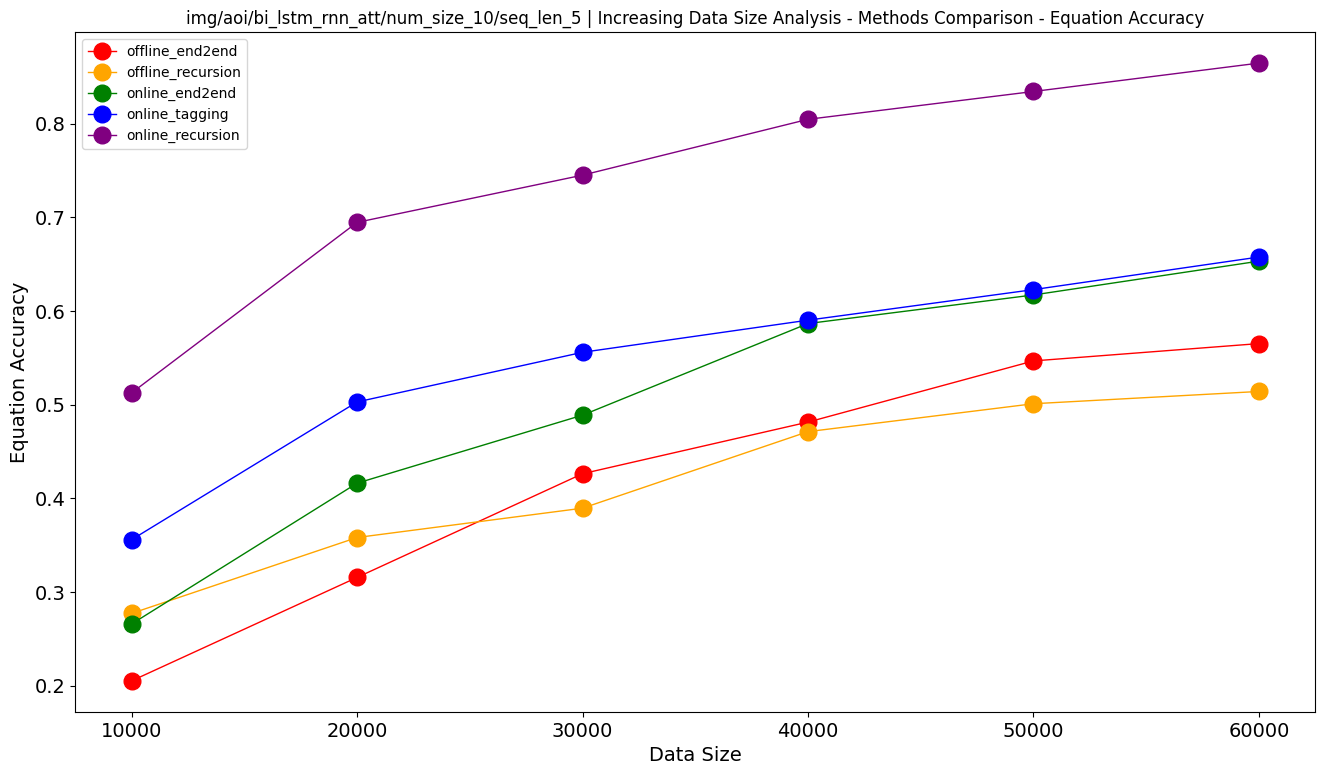

In [9]:
colors = ['red', 'orange', 'green', 'blue', 'purple']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len))

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Data Size', 
    ylabel=criteria, 
    save_path=save_path, 
    yticks=range(min_data_size, max_data_size+1, 10000), 
    marker=True
)

In [74]:
a = '3 - 3 + 9 + 3 == 6'
a

'3 - 3 + 9 + 3 == 6'

In [75]:
a = a.split()
a

['3', '-', '3', '+', '9', '+', '3', '==', '6']

In [76]:
a[:-2]

['3', '-', '3', '+', '9', '+', '3']

In [77]:
a[-1]

'6'

In [80]:
eval(''.join(a[:-2])) == str(a[-1])

False